In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### How are coefficients affected ? 

The most critical distinction between Lasso and Ridge Regression is that Lasso has the ability to make coefficients exactly zero.

The Benefit (Dimensionality Reduction): When working with high-dimensional data (many input columns, e.g., X1,X2,…,X100), it is common to have unimportant columns. Lasso addresses this by:

1. Identifying columns that are less important for calculating the output Y.
2. Setting the corresponding coefficients for those less important columns to zero (e.g., w3=0,w5=0,…).
3. Effectively filtering out these columns, thereby decreasing the dimensionality of the dataset and performing feature selection automatically.
   
This makes Lasso generally preferred over Ridge when working with high-dimensional datasets where many features might not matter.

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [3]:
data = load_diabetes()

In [4]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET']= data.target

In [5]:
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  TARGET  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=4)

In [7]:
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)

    coefs.append(reg.coef_.tolist())
    ypred = reg.predict(x_test)
    r2_scores.append(r2_score(y_test,ypred))

/tmp/ipykernel_13/3089172717.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(x_train,y_train)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.053e+05, tolerance: 2.135e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


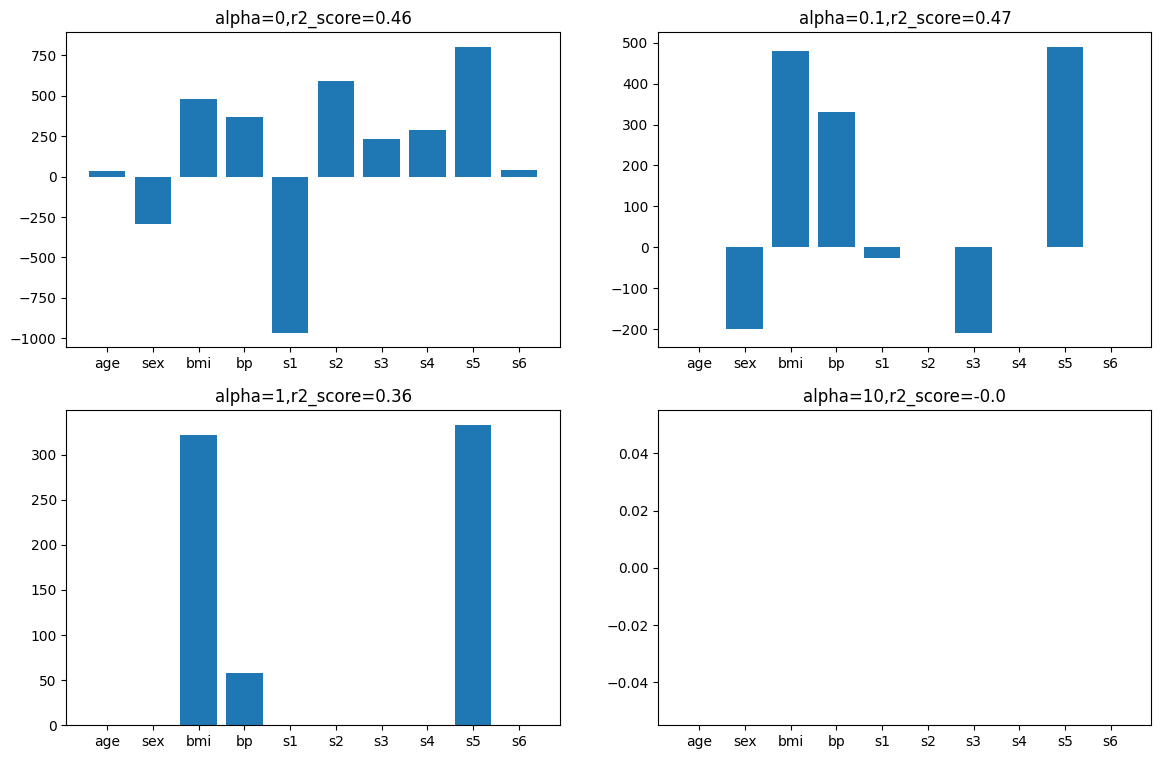

In [8]:
plt.figure(figsize =(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('alpha=0,r2_score={}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('alpha=0.1,r2_score={}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('alpha=1,r2_score={}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('alpha=10,r2_score={}'.format(round(r2_scores[3],2)))

plt.show()

# Higher Coefficients are affected more

 Coefficients that are initially large (in magnitude, especially those identified as important when λ=0) are penalized, and thus decrease much more quickly than smaller coefficients as λ increases.

In [9]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())

/tmp/ipykernel_13/3450747153.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(x_train,y_train)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.053e+05, tolerance: 2.135e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [10]:
input_array = np.array(coefs)

In [11]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha']=alphas
coef_df.set_index('alpha')

age         sex         bmi          bp          s1  \
alpha                                                                   
0.0000      33.409541 -292.241128  481.080028  369.057161 -966.324633   
0.0001      33.435970 -292.120731  481.143790  368.983804 -959.527405   
0.0010      33.673650 -291.037325  481.717325  368.323724 -898.375502   
0.0100      33.901255 -279.555350  487.811578  362.981077 -454.061411   
0.1000       0.000000 -198.916064  480.672918  330.628495  -26.567493   
1.0000       0.000000   -0.000000  321.207708   57.744756    0.000000   
10.0000      0.000000    0.000000    0.000000    0.000000    0.000000   
100.0000     0.000000    0.000000    0.000000    0.000000    0.000000   
1000.0000    0.000000    0.000000    0.000000    0.000000    0.000000   
10000.0000   0.000000    0.000000    0.000000    0.000000    0.000000   

                    s2          s3          s4          s5         s6  
alpha                                                                  
0.0000      589.771088  232.598256  288.321646  802.699013  37.813458  
0.0001      584.660783  229.260302  286.938442  800.266042  37.744408  
0.0010      538.685818  199.229375  274.493118  778.377890  37.123152  
0.0100      194.474905   -0.000000  205.003950  615.473031  31.814030  
0.1000       -0.000000 -209.481387    0.000000  490.409752   0.500941  
1.0000        0.000000   -0.000000    0.000000  332.413863   0.000000  
10.0000       0.000000   -0.000000    0.000000    0.000000   0.000000  
100.0000      0.000000   -0.000000    0.000000    0.000000   0.000000  
1000.0000     0.000000   -0.000000    0.000000    0.000000   0.000000  
10000.0000    0.000000   -0.000000    0.000000    0.000000   0.000000

In [12]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(x_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    
input_array = np.array(coefs).T

/tmp/ipykernel_13/1788936785.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(x_train,y_train)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.053e+05, tolerance: 2.135e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


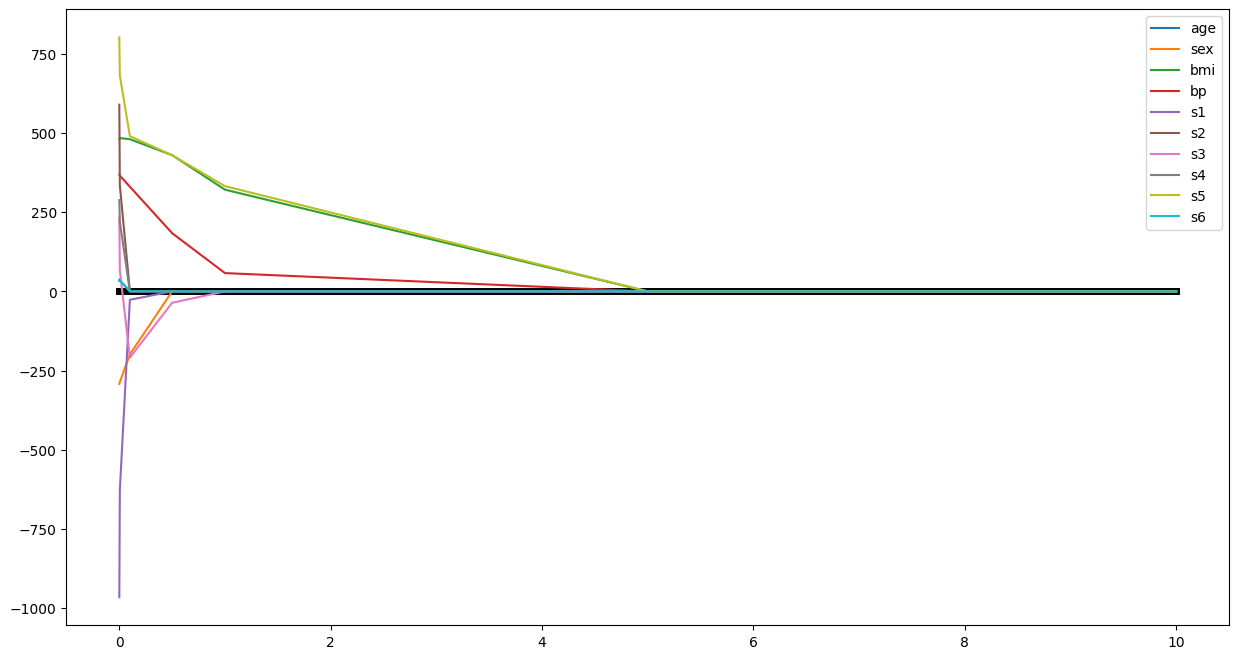

In [13]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

# Impact on Bias and Variance

Lasso Regression helps manage the bias-variance trade-off, which is central to fighting overfitting.

• Low λ: The model is more complex, resulting in low bias (good training accuracy) but high variance (overfitting).

• Increasing λ: Increasing λ decreases the overfitting.

    ◦ Bias: Increases (as the model becomes simpler and coefficients shrink toward zero).
    ◦ Variance: Decreases (as the model stabilizes).
    
Finding the Optimal λ: The ideal value of λ is sought where the increasing bias and decreasing variance curves meet or are close to balancing each other, minimizing the total generalization error. Selecting a value in this optimal zone allows for effective feature selection without causing complete underfitting.


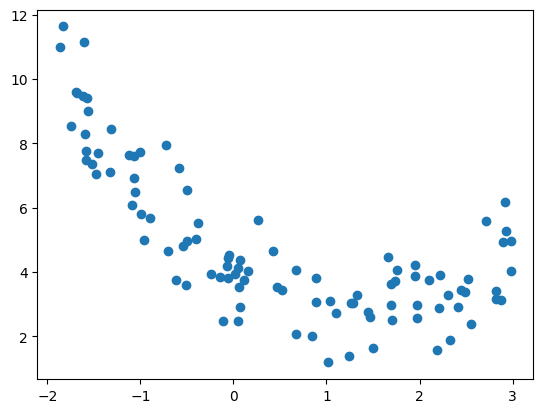

In [14]:
m=100
X= 5*np.random.rand(m,1)-2
y= 0.7*X**2 - 2*X + 4 +np.random.randn(m,1)

plt.scatter(X,y)
plt.show()

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [16]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree =  10)

X_train = pol.fit_transform(X_train)
X_test = pol.transform(X_test)

In [17]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)
loss = []
bias = []
variance =[]

for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train,y_train)
    avg_expected_loss,avg_bias,avg_variance = bias_variance_decomp(
        reg,X_train,y_train,X_test,y_test,
        loss='mse',random_seed = 123
    )

    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_variance)

/tmp/ipykernel_13/2729173794.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train,y_train)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.404e+01, tolerance: 4.630e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/mlxte

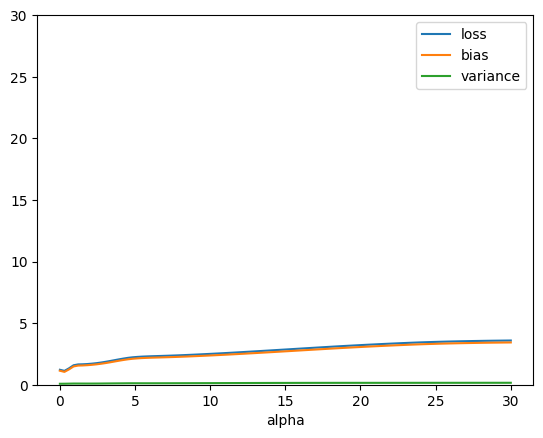

In [18]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,variance,label='variance')
plt.ylim(0,30)
plt.xlabel('alpha')
plt.legend()
plt.show()

# Effect of Regularization on Loss Function

• Lasso Loss Function Shape: When the loss function is plotted against the coefficient value (m), as λ increases, the curve shifts upwards and becomes steeper.

• The Crucial Angle: Unlike Ridge Regression, where the curve retains its smooth shape, in Lasso, increasing λ causes an angle or sharp corner to form at m=0.

• Zeroing Mechanism: The minimum of the loss function shifts towards m=0. Once the minimum hits this angle point at m=0, increasing λ further does not move the optimal coefficient backward (into the negative range) but causes the curve to simply rise upward from that zero point. This behavior ensures that the coefficient remains pinned precisely at zero, which is the mathematical basis for Lasso's ability to perform feature selection.

[27.82809103]
-2.294744558676981


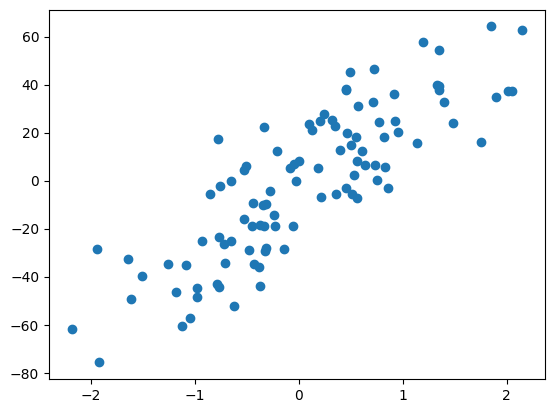

In [19]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [20]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*abs(m)
def predict(m):
    return m*X - 2.29

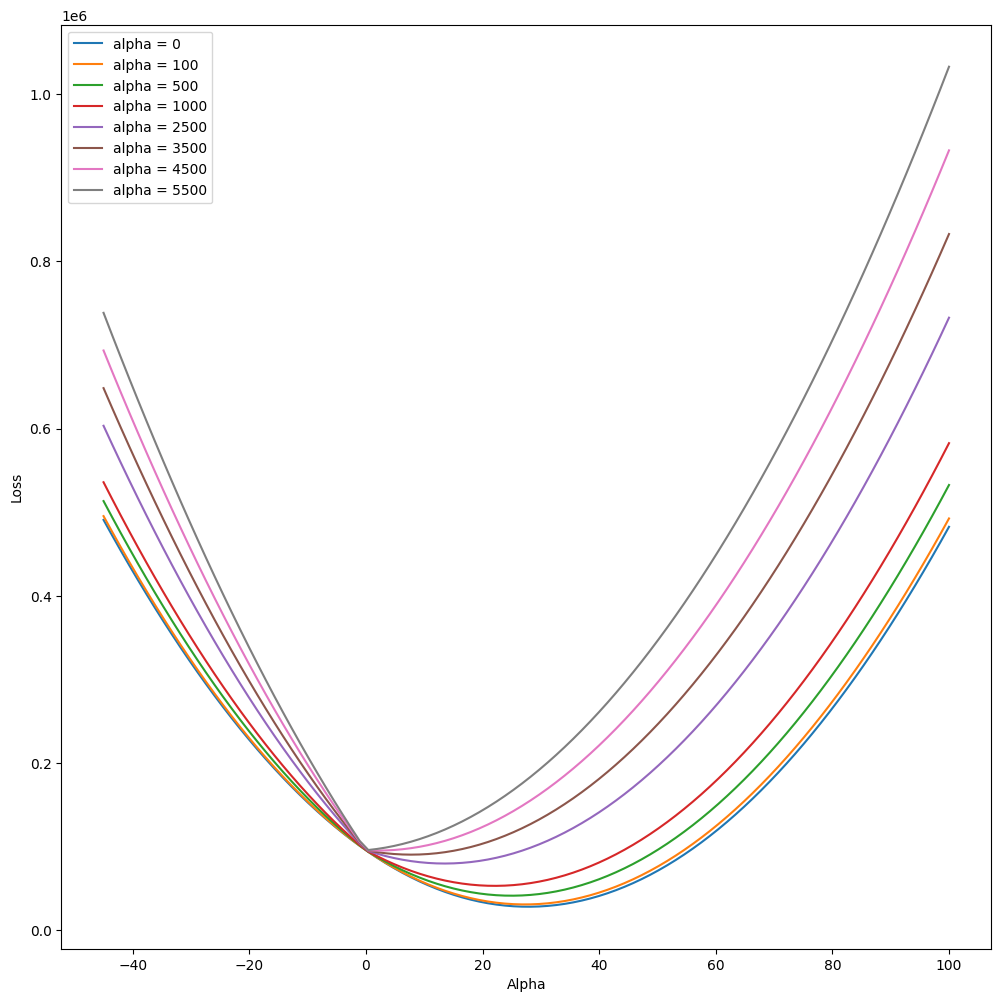

In [21]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,1000,2500,3500,4500,5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()

# Why lasso regression create sparsity? 

The fundamental reason Lasso Regression (L1) creates sparsity—meaning it can set the coefficients (weights) of certain features to exactly zero—can be explained simply by looking at the location of the regularization term (λ) in the underlying mathematics.

Here is the simple explanation:

1. Lasso's Formula Position: In Lasso Regression, the regularization parameter (λ) appears in the numerator of the formula used to calculate the coefficient (m). Crucially, the λ term is subtracted from the standard calculation component (the OLS Term).
2. Driving the Numerator to Zero: As you increase the value of λ (the penalty), you are subtracting more and more from the numerator. Eventually, if λ becomes equal to the OLS Term, the entire numerator becomes zero, forcing the resulting coefficient (m) to be exactly zero.
3. The Stopping Mechanism: Unlike Ridge Regression, once Lasso forces a coefficient to zero, it is designed to stop at zero. If the penalty (λ) were increased further, the algorithm would find that the resulting coefficient calculation leads to a higher (worse) loss compared to just keeping the coefficient at zero, so it "pins" the value at zero.
In contrast, Ridge Regression cannot create sparsity because its λ term is added to the denominator. While increasing the denominator makes the resulting coefficient very small (close to zero), it can never make the coefficient mathematically equal to zero unless the numerator was already zero.

Therefore, the location of λ in the numerator is what empowers Lasso to effectively perform feature selection by eliminating irrelevant input columns.

Lasso : 



![Lasso](https://www.pythonkitchen.com/assets/pk5-300x92.png)

Ridge:



![Ridge](https://www.pythonkitchen.com/assets/pk44-300x96.png)